# Importing necessary packages

In [1]:
import pandas as pd # For handling the data

import seaborn as sns # For plotting
import matplotlib.pyplot as plt 
import plotly_express as px 

import numpy as np

# reading in the file


In [2]:
df = pd.read_excel("../Lab_Data/Covid19.xlsx", sheet_name="Veckodata Riket") # Using pandas read_excel function to read the data in excel


## Initial Data Analisys

In [3]:
df.head(3) #  To get the 3 first just to see what the column names are and a bit of info och what the data looks like

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0


In [ ]:
df.info() # Get relevant data och how many entries are null and what Data type they are
# No nulls, No objects in data types.

In [ ]:
df.describe() # Get useful data like max number in veckonumber is 53. 

In [ ]:
df.isnull().sum() # No nulls.

# Combine Year and Veckonummer

In [7]:
df.insert(0, "Vecka", df["år"].astype(str) + "v" + df["veckonummer"].astype(str))
df.pop("år")
df.pop("veckonummer")

df.head()

,Vecka,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020v6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020v7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020v8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020v9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020v10,211,2,2,225,2,3,3,0,0.0,0,0.0


## Plotting with Seaborn

In [ ]:
year = df["Vecka"]

fig, ax = plt.subplots(2,2, figsize = (16, 12), dpi = 120)

sns.lineplot(df, x = year, y = df["Antal_avlidna_vecka"], ax = ax[0,0]) # Title is not informativ. Change later
sns.lineplot(df, x = year, y = df["Antal_nyaintensivvårdade_vecka"], ax = ax[0,1]) # Same as above

sns.lineplot(df, x = year, y = df["Antal_avlidna_vecka"], ax = ax[1,0])
sns.lineplot(df, x = year, y = df["Antal_nyaintensivvårdade_vecka"], ax = ax[1,0]) # Same as above

sns.lineplot(df, x = year, y = df["Kum_antal_fall"], ax = ax[1,1]).set_yscale("log") # Same as above


ax[0,0].xaxis.set_major_locator(plt.MaxNLocator(9))
ax[0,1].xaxis.set_major_locator(plt.MaxNLocator(9))
ax[1,0].xaxis.set_major_locator(plt.MaxNLocator(9))
ax[1,1].xaxis.set_major_locator(plt.MaxNLocator(9))

ax[0,0].set(title="Avlidna per vecka")
ax[0,1].set(title="Nya fall per vecka")
ax[1,0].set(title="Avlinda / Fall per vecka")
ax[1,1].set(title="Kumulativt antal fall");


In [9]:
# Creating lists of necessary data
# 

# Function for plotting Seaborn Graphs

In [10]:
# Function for plotting seaborn graphs.
titles = [
    "Antal Avlidna per Vecka",
    "Antal Fall per Vecka",
    "Avlidna och Fall / Vecka",
    "Kumulativt Antal Fall",
]
datapoints = [
    "Antal_avlidna_vecka",
    "Antal_fall_vecka",
    "Antal_avlidna_vecka",
    "Antal_fall_vecka",
    "Kum_antal_fall",
]
y_label = ["Antal Personer"] * 4


def sns_plot_func(x, y, label, data):  # setting the function
    """Used to quickly plot with seaborn"""  # Docstring PLACEHOLDER
    fig, ax = plt.subplots(
        figsize=(16, 8), dpi=120
    )  # Subplot. TODO add actual subplots with ifstatement to check if list is >=2
    sns.lineplot(data=data, x=x, y=y, label=label)  # Plot code
    ax.xaxis.set_major_locator(
        plt.MaxNLocator(15)
    )  # Set major locator to not show all values on x.
    ax.xaxis.set_tick_params(rotation=-45)
    #ax.set_ylabel(y_label)
    if (
        data[y].max() >= 10**6
    ):  # ifstatement to see if y data is above 1000000. if it is set yscale to logorithmic scale.
        ax.set_yscale("log")


#for axes, title, y_label in zip(ax.reshape(-1), titles, y_label):
#for i in range(5):
    #sns_plot_func(year, datapoints[i], titles[i], df)


In [ ]:
sns_plot_func(year, "Kum_antal_fall",titles[3], df)#, #sns_plot_func(year, "Antal_nyaintensivvårdade_vecka",df)
print(len(y_label))
print(len(titles))
print((datapoints))


In [ ]:
sns.lineplot(df, x = year, y = df["Antal_avlidna_vecka"]).xaxis.set_major_locator(plt.MaxNLocator(9)) # Title is not informative. Change later
sns.lineplot(df, x = year, y = df["Antal_nyaintensivvårdade_vecka"], linestyle = "dashed").twinx();#.xaxis.set_major_locator(plt.MaxNLocator(9)) # Same as above

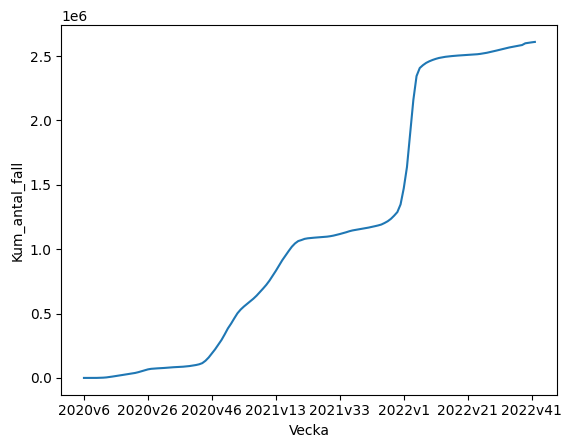

In [13]:
# f) Rita linjediagram av kumulativt antal fall från 2020v6 till nu.

fig = sns.lineplot(df, x = year, y = df["Kum_antal_fall"]).xaxis.set_major_locator(plt.MaxNLocator(9))

# Plotly express plotting C-F

In [14]:
fig = px.line(df, x = "Vecka", y = "Antal_avlidna_vecka", title = "Antal Avldina per Vecka")
fig.update_layout(yaxis_title = "Antal Personer")
fig.update_xaxes(tickangle=45)
fig.show()


In [15]:
fig = px.line(df, x = "Vecka", y = "Antal_fall_vecka", title = "Antal Fall per Vecka")
fig.update_layout(yaxis_title = "Antal Personer")
fig.update_xaxes(tickangle=45)
fig.show()

In [16]:
fig = px.line(df, x = "Vecka", y = ["Antal_avlidna_vecka","Antal_fall_vecka"], title = "Antal Avlidna och Fall per Vecka")
fig.update_layout(yaxis_title = "Antal Personer")
fig.update_xaxes(tickangle=45)
fig.show()

In [17]:
fig = px.line(df, x = "Vecka", y = "Kum_antal_fall", title = "Kumulativt Antal Fall per vecka")
fig.update_layout(yaxis_title = "Antal Personer")
fig.update_xaxes(tickangle=45)
fig.show()

## Uppgift 2

In [18]:
df_vaccine = pd.read_excel("../Lab_Data/Vaccine.xlsx", sheet_name= "Vaccinerade kommun och ålder")

In [ ]:
df_vaccine.head()
df_vaccine.info()  # Län_namn, Kommun_namn and Ålder are objects. rest are int or floats
df_vaccine.isnull().sum() # Ammount of nulls are: Antal 3 doser 580, Antal 4 doser 2030, Andel 3 doser 580, Andel 4 doser 2030


# A)
- Hur många län finns representerade i datasetet?

In [20]:
len(df_vaccine["Län"].drop_duplicates().value_counts())
#answer = 21

21

b) Hur många kommuner finns representerade i datasetet?


In [21]:
len(df_vaccine["Kommun"].drop_duplicates().value_counts())
# Answer is 290 Kommuner.

290

c) Hur stor är befolkningen som är representerad i datasetet?


In [22]:
df_vaccine["Befolkning"].sum()
# Answer is 9 092 790

9092790

d) Beräkna hur många barn under 18 år det finns i Sverige baserat på det här datasetet. Du får leta upp
statistik på hur stor totala befolkningen är i Sverige.

In [23]:
# First up i will try to get the string index of the two first values in each row.
df_vaccine["Ålder"][0][:2] # Succsess! Loop through every value and see that it is below 18 in order to find all indexes where we can check befolkning
# Now i need a way to save that row into another dataframe.
# Nevermind i can get the value of the population using the .loc method.
df_vaccine.loc[0][5] # Get value of 

len(df_vaccine)

2900

In [24]:
#Time to try a simple for loop.
population = 0
for i in range(len(df_vaccine)): # For loop that goes through the whole data frame.
    if int(df_vaccine["Ålder"][i][:2]) < 18: # If ålder on the first age shown is below 18 it is always below 18. there are no examples in the sheet showing an age range going from e.g. 17-20
        population += df_vaccine.loc[i][5] # Add the number into a templist.

print(f"The population below 18 years is {population}")

The population below 18 years is 745370


In [25]:
# Håkans solution that is much better:
df_vaccine[(df_vaccine["Ålder"] == "12-15") | (df_vaccine["Ålder"] == "16-17")]["Befolkning"].sum() 
# ↑ Dataframe        ↑Checks Ålder column, and what rows are matching         ↑ If rows match. we take the sum from Befolkning.              

745370

In [26]:
px.histogram(df_vaccine, x = "Ålder", y = "Befolkning", title = "Diagram över åldersfördelning Sverige 2022").update_layout(yaxis_title = "Befolkning i Miljoner")

In [27]:
df_vaccine.Län_namn.unique()

array(['Stockholms län', 'Uppsala län', 'Södermanlands län',
       'Östergötlands län', 'Jönköpings län', 'Kronobergs län',
       'Kalmar län', 'Gotlands län', 'Blekinge län', 'Skåne län',
       'Hallands län', 'Västra Götalands län', 'Värmlands län',
       'Örebro län', 'Västmanlands län', 'Dalarnas län', 'Gävleborgs län',
       'Västernorrlands län', 'Jämtlands län', 'Västerbottens län',
       'Norrbottens län'], dtype=object)

In [28]:
# 2)f
vaccine_lan = df_vaccine.groupby("Län")
befolkning_sum = vaccine_lan["Befolkning"].sum()

fig = px.bar(
    y=[
        round((vaccine_lan["Antal minst 1 dos"].sum() / befolkning_sum)*100), # precentage of vaccine lan.
        round(vaccine_lan["Antal minst 2 doser"].sum() / befolkning_sum*100),
        round(vaccine_lan["Antal 3 doser"].sum() / befolkning_sum*100),
    ],
    title="Antal Doser per Vaccinerade per Län",
    labels={"value": "Andel Vaccinerade, Procent", "x": "Län", "variable": "Dos"},
    x=df_vaccine["Län_namn"].unique(),
    barmode="group",
)
bar_names = {
    "wide_variable_0": "Dos Ett",
    "wide_variable_1": "Dos Två",
    "wide_variable_2": "Dos Tre",
}

# How does this code work? Todo ask Håkan how this code works or google.
# Source https://stackoverflow.com/questions/64371174/plotly-how-to-change-variable-label-names-for-the-legend-in-a-plotly-express-li
fig.for_each_trace(
    lambda t: t.update(
        name=bar_names[t.name],
        legendgroup=bar_names[t.name],
        hovertemplate=t.hovertemplate.replace(t.name, bar_names[t.name]),
    )
)

fig.show()


In [29]:
import plotly.graph_objects as go

# All of this code is code is placeholder and from Håkan
vaccin_vg = df_vaccine[df_vaccine["Län_namn"] == "Västra Götalands län"]
vaccin_sthlm = df_vaccine[df_vaccine["Län_namn"] == "Stockholms län"]

vg_1 = vaccin_vg["Antal minst 1 dos"].sum() / vaccin_vg["Befolkning"].sum()
vg_2 = vaccin_vg["Antal minst 2 doser"].sum() / vaccin_vg["Befolkning"].sum()
vg_3 = vaccin_vg["Antal 3 doser"].sum() / vaccin_vg["Befolkning"].sum()
vg_4 = vaccin_vg["Antal 4 doser"].sum() / vaccin_vg["Befolkning"].sum()

sthlm_1 = vaccin_sthlm["Antal minst 1 dos"].sum() / vaccin_sthlm["Befolkning"].sum()
sthlm_2 = vaccin_sthlm["Antal minst 2 doser"].sum() / vaccin_sthlm["Befolkning"].sum()
sthlm_3 = vaccin_sthlm["Antal 3 doser"].sum() / vaccin_sthlm["Befolkning"].sum()
sthlm_4 = vaccin_sthlm["Antal 4 doser"].sum() / vaccin_sthlm["Befolkning"].sum()

categories = ["Minst 1 dos", "Minst 2 doser", "Minst 3 doser", "4 doser"]

fig = go.Figure()

fig.add_trace(
    go.Scatterpolar(
        r=[vg_1, vg_2, vg_3, vg_4],
        theta=categories,
        fill="toself",
        name="vg",
    )
)
fig.add_trace(
    go.Scatterpolar(
        r=[sthlm_1, sthlm_2, sthlm_3, sthlm_4],
        theta=categories,
        fill="toself",
        name="sthlm",
    )
)

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])), showlegend=False
)

fig.show()

## KPI
___

## KPI one.
- amount of cases per each age group.
- amount of deaths in relation to cases per age group.

In [42]:
age_group = pd.read_excel("../Lab_Data/Covid19.xlsx", sheet_name="Totalt antal per åldersgrupp")
#no nulls. "Ålder is object. rest are int."¨
age_group.head()

,Åldersgrupp,Totalt_antal_fall,Totalt_antal_intensivvårdade,Totalt_antal_avlidna
0,Ålder_0_9,138071,109,17
1,Ålder_10_19,355823,101,9
2,Ålder_20_29,418506,285,41
3,Ålder_30_39,493443,492,71
4,Ålder_40_49,474702,997,172


In [54]:
calc =0 # checking amount of cases procenteges by age group
for i in range(len(age_group["Totalt_antal_fall"])):
    print(round(age_group["Totalt_antal_fall"][i] / age_group["Totalt_antal_fall"].sum()*100))
    calc += age_group["Totalt_antal_fall"][i] / age_group["Totalt_antal_fall"].sum()*100

round(calc)

5
14
16
19
18
14
7
3
2
1
0


100

# Sources:

## Data
___
- Data attained at 2022-11-01 - 14:06
- https://www.folkhalsomyndigheten.se/smittskydd-beredskap/utbrott/aktuella-utbrott/covid-19/statistik-och-analyser/bekraftade-fall-i-sverige/
- https://www.folkhalsomyndigheten.se/smittskydd-beredskap/utbrott/aktuella-utbrott/covid-19/statistik-och-analyser/bekraftade-fall-i-sverige/
## Code
___
- Code attained 2022-11-04 - 18:46
- https://stackoverflow.com/questions/64371174/plotly-how-to-change-variable-label-names-for-the-legend-in-a-plotly-express-li